In [ ]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

### ***IMPORTING DATASET***

In [ ]:
data = pd.read_csv("/content/MagicBricks.csv")
data.head(2)


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0


In [ ]:
data['Bathroom'] = data['Bathroom'].astype('Int64')
data['Parking'] = data['Parking'].astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   Int64  
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   Int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: Int64(2), float64(2), int64(2), object(5)
memory usage: 110.8+ KB


### ***CLEANING DATA***

In [ ]:
data['Bathroom'] = data['Bathroom'].replace('', pd.NA).fillna(data['BHK'])
data['Parking'] = data['Parking'].replace('', pd.NA)
data.loc[data['Type'] == "Apartment", 'Parking'] = 1
data['Per_Sqft'] = data['Per_Sqft'].fillna(data['Price']//data['Area'])
data['Parking'].fillna(data['Parking'].mode()[0], inplace=True)
data['Furnishing'].fillna(data['Furnishing'].mode()[0], inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   Int64  
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   Int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Per_Sqft     1259 non-null   float64
dtypes: Int64(2), float64(2), int64(2), object(5)
memory usage: 110.8+ KB


In [ ]:
print(data.columns)

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')


### ***PAIR PLOT***

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

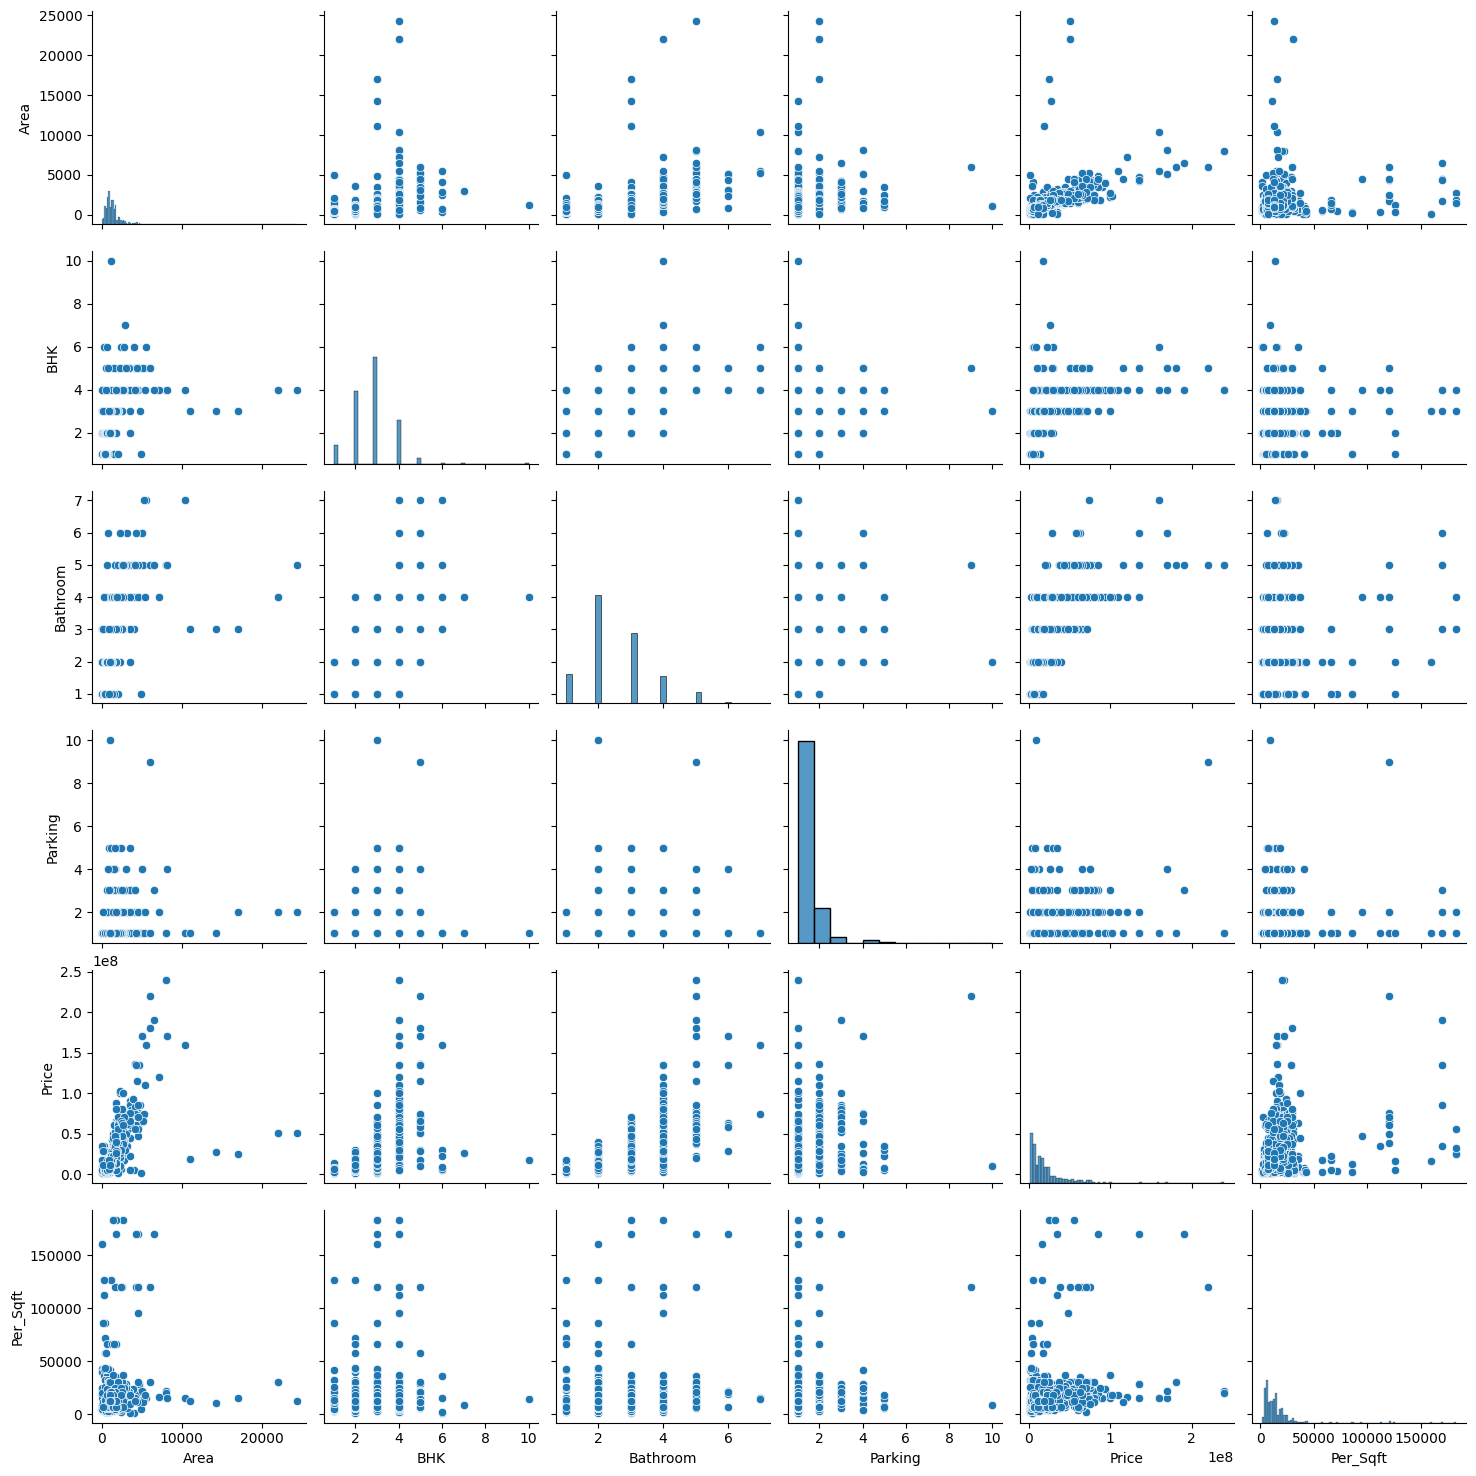

In [ ]:
import seaborn as sns
all_columns = ['Area', 'BHK', 'Bathroom', 'Parking', 'Price','Per_Sqft']
data_all_columns = data[all_columns]
data_all_columns = data_all_columns.apply(pd.to_numeric, errors='coerce')
sns.pairplot(data_all_columns)
plt.show()



### ***ENCODING OBJECT DATA***

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Furnishing'] = label_encoder.fit_transform(data['Furnishing'])
data['Locality'] = label_encoder.fit_transform(data['Locality'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Transaction'] = label_encoder.fit_transform(data['Transaction'])
data['Type'] = label_encoder.fit_transform(data['Type'])


### ***REMOVING OUTLIERS***

In [ ]:
z_threshold = 3
tukey_fence_multiplier = 1.5
data_numeric = data.select_dtypes(include=[np.number])
z_scores = (data_numeric - data_numeric.mean()) / data_numeric.std()
outliers = (z_scores.abs() > z_threshold).any(axis=1)
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
tukey_fence_low = Q1 - tukey_fence_multiplier * IQR
tukey_fence_high = Q3 + tukey_fence_multiplier * IQR
outliers = outliers | ((data_numeric < tukey_fence_low) | (data_numeric > tukey_fence_high)).any(axis=1)
data_no_outliers = data[~outliers]

### ***CORRELATION***

In [ ]:

corr = data.corr()


array([1, 0])

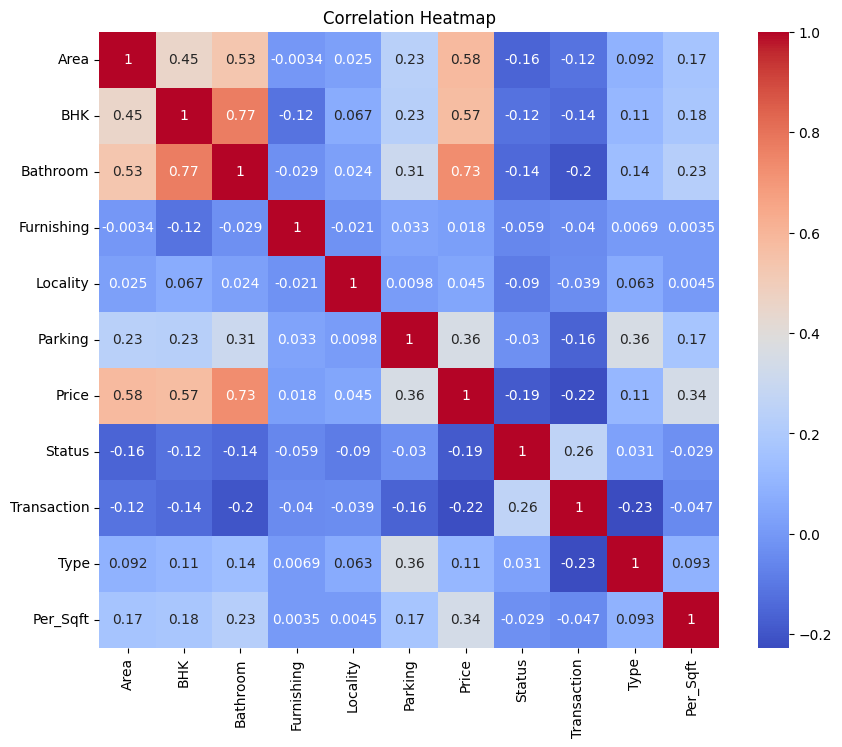

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   Int64  
 3   Furnishing   1259 non-null   int64  
 4   Locality     1259 non-null   int64  
 5   Parking      1259 non-null   Int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   int64  
 8   Transaction  1259 non-null   int64  
 9   Type         1259 non-null   int64  
 10  Per_Sqft     1259 non-null   float64
dtypes: Int64(2), float64(2), int64(7)
memory usage: 110.8 KB


### ***TRAINING DATA***

In [ ]:
X = data.drop(['Price'], axis=1)
y = data['Price']

### ***LINEAR REGRESSION***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)

### ***RANDOM FOREST REGRESSION***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2_random = r2_score(y_test, y_pred)
mse_random = mean_squared_error(y_test, y_pred)
rmse_random = np.sqrt(mse_random)



### ***GRADIENT BOOSTING REGRESSION***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
r2_GB = r2_score(y_test, y_pred)
mse_GB = mean_squared_error(y_test, y_pred)
rmse_GB = np.sqrt(mse_GB)


### ***XGRADIENT BOOSTING REGRESSION***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, xgb_predictions)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
rmse_xgb = np.sqrt(mse_xgb)


### ***BEST SUITED MODEL FOR THIS DATASET***

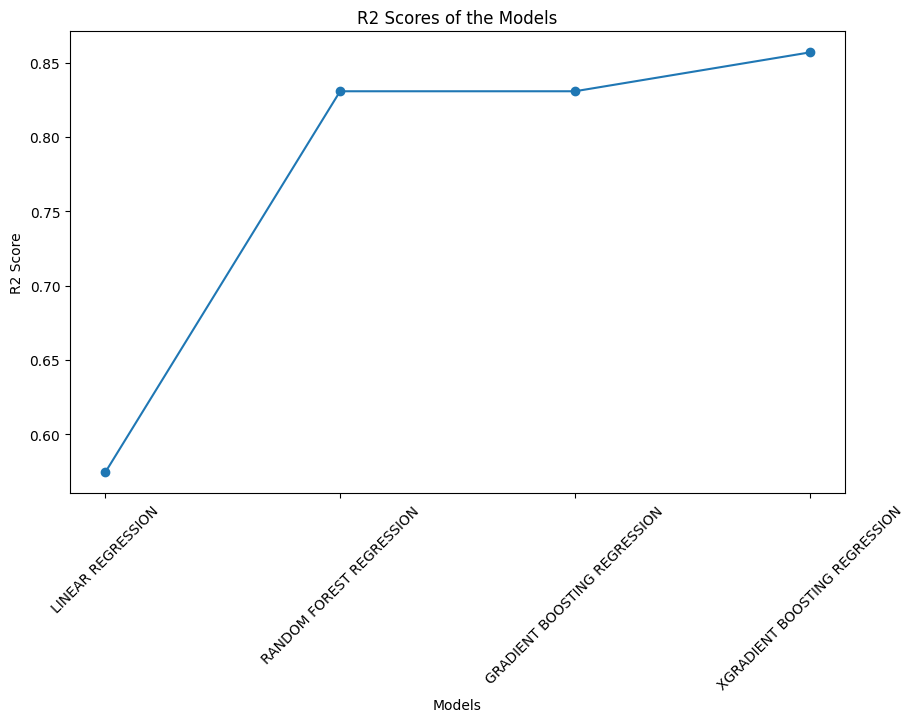

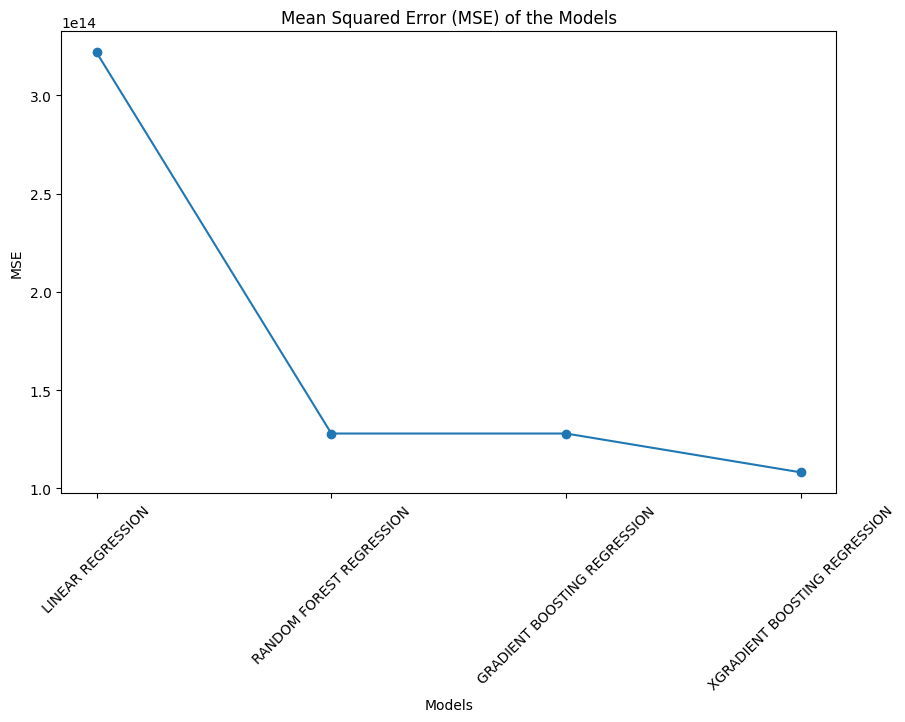

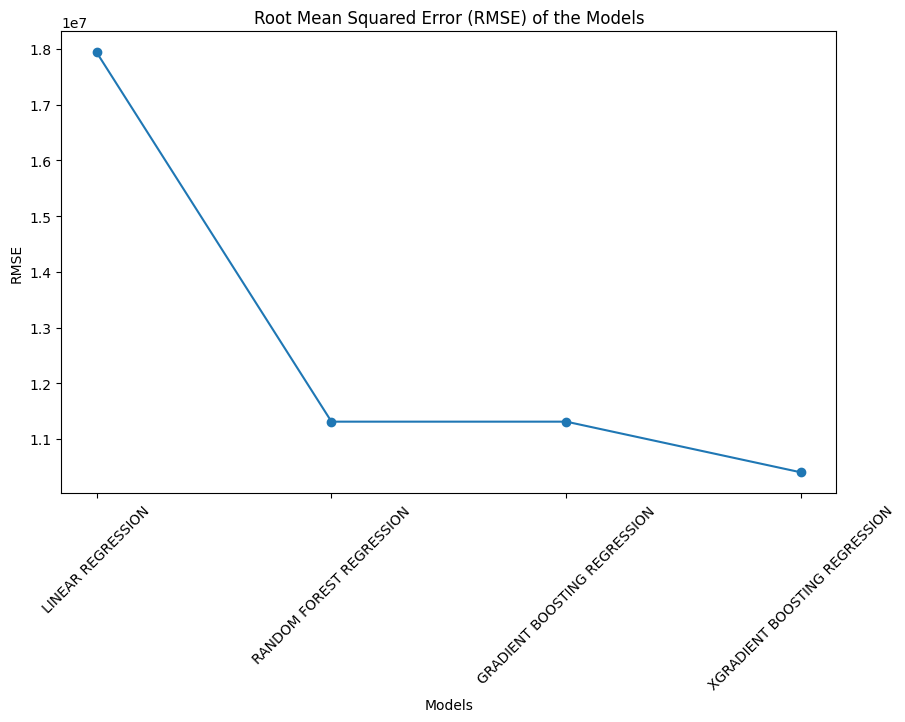

In [ ]:
models = ['LINEAR REGRESSION', 'RANDOM FOREST REGRESSION', 'GRADIENT BOOSTING REGRESSION', 'XGRADIENT BOOSTING REGRESSION']
r2_scores = [r2_linear, r2_random, r2_GB, r2_xgb]
mse_values = [mse_linear, mse_random, mse_GB, mse_xgb]
rmse_values = [rmse_linear, rmse_random, rmse_GB, rmse_xgb]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores,marker = 'o')
plt.title('R2 Scores of the Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(models, mse_values,marker = 'o')
plt.title('Mean Squared Error (MSE) of the Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_values,marker = 'o')
plt.title('Root Mean Squared Error (RMSE) of the Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation = 45)
plt.show()

### ***TEST DATA***

In [ ]:
l = []
l.append(int(input("Enter the area: ")))
l.append(int(input("Enter the BHK: ")))
l.append(int(input("Enter the number of Bathrooms: ")))
l.append(int(input("Enter the Furnishing type (0: Unfurnished / 1: Semi Furnished / 2: Furnished): ")))
a = input("Enter the Locality: ")
l.append(label_encoder.fit_transform([a]))
l.append(int(input("Enter the Parking status (0/1): ")))
l.append(int(input("Enter the status (0: Almost ready / 1: Ready to move): ")))
l.append(int(input("Enter the Transaction (0: Resale / 1: New Property): ")))
l.append(int(input("Enter the Type (0: Builder Floor / 1: Apartment): ")))
l.append(int(input("Enter the cost of per SQft: ")))
l = np.array(l).reshape(1, -1)


Enter the area: 800
Enter the BHK: 3
Enter the number of Bathrooms: 2
Enter the Furnishing type (0: Unfurnished / 1: Semi Furnished / 2: Furnished): 1
Enter the Locality: Rohini Sector 25
Enter the Parking status (0/1): 1
Enter the status (0: Almost ready / 1: Ready to move): 1
Enter the Transaction (0: Resale / 1: New Property): 1
Enter the Type (0: Builder Floor / 1: Apartment): 0
Enter the cost of per SQft: 6667


<ipython-input-35-8e51423830d7>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  l = np.array(l).reshape(1, -1)


### ***PREDICTION***

In [ ]:
y_pred = xgb_model.predict(l)
print("Predicted price of the house is RS.%d"%(y_pred))


Predicted price of the house is RS.4550250
